# Single Pulse Signal to Noise Ratio

Referring to Section 6.2.2, the example below shows a comparison of the single pulse signal-to-noise ratio required for coherent integration and noncoherent integration.  The figure includes both approximations for noncoherent integration.  As illustrated in the figure, coherent integration outperforms noncoherent integration for increasing $N$. However, as the number of pulses becomes exceedingly large, coherent integration will start to degrade.

Begin by getting the library path

In [1]:
import libs_path

Set the probability of false alarm, the probability of detection, and the number of pulses

In [2]:
from scipy import arange

pfa = 1e-6

pd = 0.95

number_of_pulses = 10

np = arange(1, number_of_pulses + 1)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  if __name__ == '__main__':


Find the required signal to noise for the specified probability of detection and probability of false alarm

In [3]:
from Libs.detection.single_pulse import snr_reduction, snr_gain, single_pulse_snr

required_snr = single_pulse_snr(pd, pfa)

Calculate the single pulse signal to noise (Curry)

In [4]:
signal_to_noise_reduction = snr_reduction(np, required_snr)

Calculate the single pulse signal to noise (Peebles)

In [5]:
signal_to_noise_gain = snr_gain(pd, pfa, np, required_snr)

Calculate the single pulse signal to noise for coherent integration

In [6]:
from scipy import log10

signal_to_noise_coherent = 10.0 * log10(required_snr / np)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  This is separate from the ipykernel package so we can avoid doing imports until


Display the signal to noise ratio for coherent integration, for noncoherent integration (Curry and Peebles)

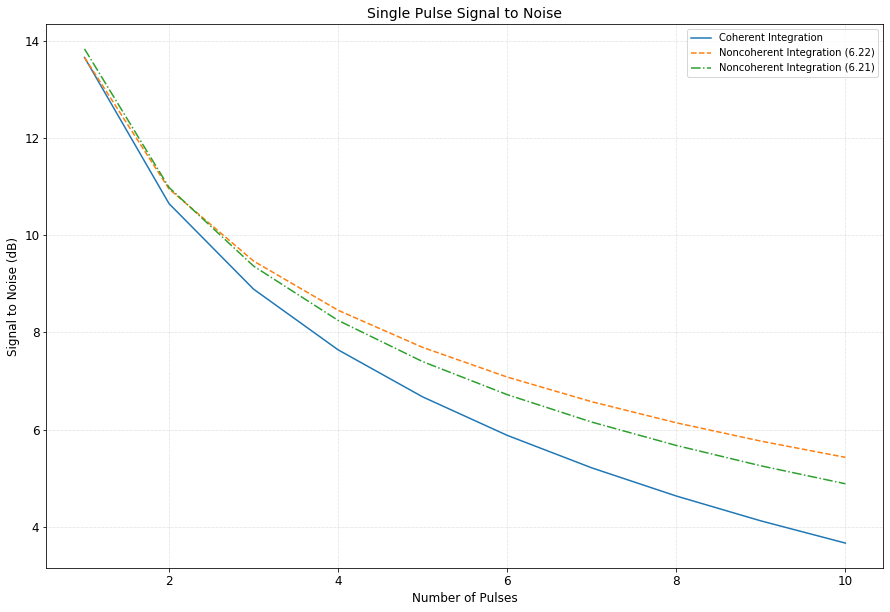

In [9]:
from matplotlib import pyplot as plt



# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



 # Display the results

plt.plot(np, signal_to_noise_coherent, '', label='Coherent Integration')

plt.plot(np, signal_to_noise_gain, '--', label='Noncoherent Integration (6.22)')

plt.plot(np, signal_to_noise_reduction, '-.', label='Noncoherent Integration (6.21)')



# Set the plot title and labels

plt.title('Single Pulse Signal to Noise', size=14)

plt.xlabel('Number of Pulses', size=12)

plt.ylabel('Signal to Noise (dB)', size=12)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Turn on the legend

plt.legend(loc='best', prop={'size': 10})